In [50]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

# Load Data into DataFrame

In [33]:
df = pd.read_csv("/Users/Tamara/Desktop/Capstone/app_events.csv")
df.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


All app_events has the is_installed = 1

60% are inactive events and 40% are active ==> Focus on active

32% of devices has events => 60% of data should be matched using the brand/model only

In [38]:
print("All app events has is_installed = 1")
df.is_installed.value_counts()

All app events has is_installed = 1


1    32473067
Name: is_installed, dtype: int64

All apps are installed

Active apps


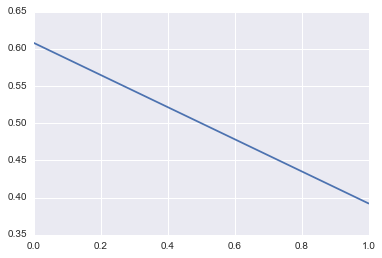

In [45]:
print ("Active apps")
active = df.is_active.value_counts()*1.0/len(df)
active
active.plot()

60% of apps are inactive

In [3]:
df2 = pd.read_csv("/Users/Tamara/Desktop/Capstone/app_labels.csv")
df2.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [4]:
df3= pd.read_csv("/Users/Tamara/Desktop/Capstone/label_categories.csv")
df3.head()
df3['category'].value_counts()

unknown                             26
Pay                                  3
the film                             3
music                                3
Insurance                            3
Lottery ticket                       3
health                               3
Science and Technology               3
Financial Information                3
Furniture                            2
navigation                           2
Direct Banking                       2
Phone                                2
Hotels                               2
Reputation                           2
P2P                                  2
other                                2
the University                       2
Smart Shopping                       2
Mother                               2
notes                                2
Enthusiasm                           2
Total Cost                           2
entertainment                        2
Sports                               2
Car                      

In [5]:
df4= pd.read_csv("/Users/Tamara/Desktop/Capstone/phone_brand_device_model.csv")
df4.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [6]:
df5 = pd.read_csv("/Users/Tamara/Desktop/Capstone/sample_submission.csv")
df5.head()

,device_id,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
0,1002079943728939269,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
1,-1547860181818787117,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
2,7374582448058474277,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
3,-6220210354783429585,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
4,-5893464122623104785,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833


In [7]:
df5.rename(columns = {'F23-':'F23','F24-26':'F24_F26', 'F27-28':'F27_F28', 
                      'F29-32':'F29_F32', 'F33-42':'F33_F42', 'F43+':'F43', 
                      'M22-':'M22', 'M23-26':'M23_M26', 'M27-28':'M27_M28', 
                      'M29-31':'M29_M31', 'M32-38':'M32_M38','M39+':'M39'}, inplace=True)


In [8]:
df5.head()

,device_id,F23,F24_F26,F27_F28,F29_F32,F33_F42,F43,M22,M23_M26,M27_M28,M29_M31,M32_M38,M39
0,1002079943728939269,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
1,-1547860181818787117,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
2,7374582448058474277,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
3,-6220210354783429585,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
4,-5893464122623104785,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833


In [9]:
df6 = pd.read_csv("/Users/Tamara/Desktop/Capstone/events.csv")
df6.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [10]:
df7 = pd.read_csv("/Users/Tamara/Desktop/Capstone/gender_age_train.csv")
df7.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [11]:
print("Percentage of Male vs. Female")
df7.gender.value_counts()/len(df7)

Percentage of Male vs. Female


M    0.641758
F    0.358242
Name: gender, dtype: float64

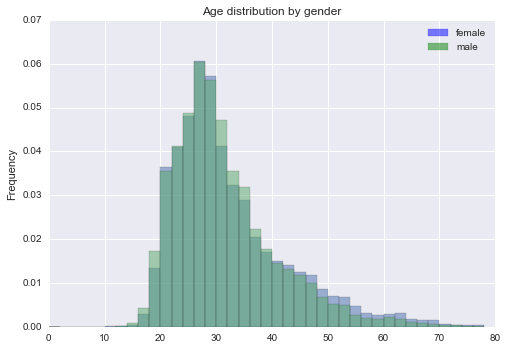

In [51]:
BINS = range(0,80,2)
gender_age_pivot = df7.loc[:,['gender','age']].pivot(columns = 'gender', values = 'age')

plt.figure()

age_female = gender_age_pivot['F'].plot.hist(normed = True, bins = BINS, alpha = 0.5)
age_female.set_title("Age distribution by gender")
age_male = gender_age_pivot['M'].plot.hist(normed = True, bins = BINS, alpha = 0.5)

female_patch = mpatches.Patch(color='blue', alpha = 0.5, label='female')
male_patch = mpatches.Patch(color='green', alpha = 0.5, label='male')
plt.legend(handles=[female_patch, male_patch])

plt.show()

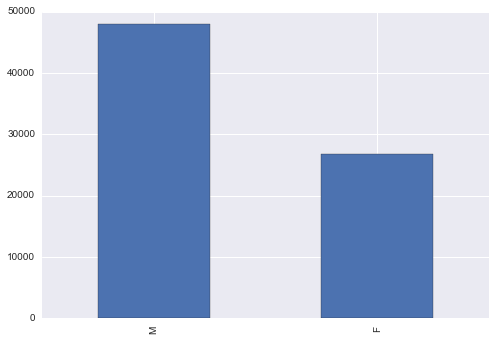

In [52]:
df7.gender.value_counts().plot(kind='bar')

In [53]:
print("Percentage distribution by group")
df7.group.value_counts().sort_values()/len(df7)

Percentage distribution by group


F27_F28    0.041771
F24_F26    0.056132
F43        0.056186
F29_F32    0.062000
F23        0.067654
M27_M28    0.072945
F33_F42    0.074499
M29_M31    0.097917
M22        0.100315
M39        0.114957
M32_M38    0.126948
M23_M26    0.128676
Name: group, dtype: float64

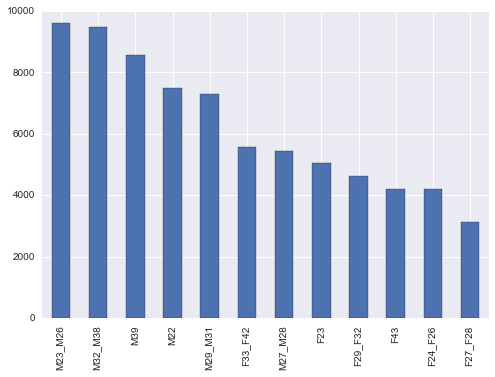

In [54]:
df7.group.value_counts().sort_values(ascending=False).plot('bar')

In [31]:
df7['group'].replace({'F23-':'F23','F24-26':'F24_F26', 'F27-28':'F27_F28', 
                      'F29-32':'F29_F32', 'F33-42':'F33_F42', 'F43+':'F43', 
                      'M22-':'M22', 'M23-26':'M23_M26', 'M27-28':'M27_M28', 
                      'M29-31':'M29_M31', 'M32-38':'M32_M38','M39+':'M39'}, inplace=True)
df7.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32_M38
1,-2897161552818060146,M,35,M32_M38
2,-8260683887967679142,M,35,M32_M38
3,-4938849341048082022,M,30,M29_M31
4,245133531816851882,M,30,M29_M31


In [16]:
%reload_ext sql

/Users/Tamara/anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/Tamara/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [17]:
%%sql 
postgresql://localhost:5432/

u'Connected: None@'

In [18]:
%%sql
DROP TABLE IF EXISTS app_events;
CREATE TABLE app_events(
event_id integer, 
app_id numeric,
is_installed integer,
is_active integer
);

COPY app_events FROM
'/Users/Tamara/Desktop/Capstone/app_events.csv'
DELIMITER ',' CSV HEADER;

Done.
Done.
32473067 rows affected.


[]

In [19]:
%%sql
DROP TABLE IF EXISTS app_labels;
CREATE TABLE app_labels(
app_id numeric, 
label_id numeric
);

COPY app_labels FROM
'/Users/Tamara/Desktop/Capstone/app_labels.csv'
DELIMITER ',' CSV HEADER;

Done.
Done.
459943 rows affected.


[]

In [20]:
%%sql
DROP TABLE IF EXISTS label_categories;
CREATE TABLE label_categories(
label_id integer, 
category_id text
);

COPY label_categories FROM
'/Users/Tamara/Desktop/Capstone/label_categories.csv'
DELIMITER ',' CSV HEADER;

Done.
Done.
930 rows affected.


[]

In [21]:
%%sql
DROP TABLE IF EXISTS phone_brand_device_model;
CREATE TABLE phone_brand_device_model(
device_id numeric, 
phone_brand text,
device_model text
);

COPY phone_brand_device_model FROM
'/Users/Tamara/Desktop/Capstone/phone_brand_device_model.csv'
DELIMITER ',' CSV HEADER;

Done.
Done.
187245 rows affected.


[]

In [22]:
%%sql
DROP TABLE IF EXISTS sample_submission;
CREATE TABLE sample_submission(
device_id numeric, 
F23 numeric,
F24_26 numeric,
F27_28 numeric,
F29_32 numeric,
F33_42 numeric,
F43 numeric,
M22 numeric,
M23_26 numeric,
M27_28 numeric,
M29_31 numeric,
M32_38 numeric,
M39 numeric
);

COPY sample_submission FROM
'/Users/Tamara/Desktop/Capstone/sample_submission.csv'
DELIMITER ',' CSV HEADER;

Done.
Done.
112071 rows affected.


[]

In [23]:
%%sql
DROP TABLE IF EXISTS events;
CREATE TABLE events(
event_id integer, 
device_id numeric,
timestamp text,
longitute numeric,
latitude numeric
);

COPY events FROM
'/Users/Tamara/Desktop/Capstone/events.csv'
DELIMITER ',' CSV HEADER;


Done.
Done.
3252950 rows affected.


[]

In [24]:
%%sql
DROP TABLE IF EXISTS gender_age_train;
CREATE TABLE gender_age_train(
device_id numeric,
gender text,
age integer,
group object
);

COPY events FROM
'/Users/Tamara/Desktop/Capstone/gender_age_train.csv'
DELIMITER ',' CSV HEADER;

Done.
(psycopg2.ProgrammingError) syntax error at or near "group"
LINE 5: group object
        ^
 [SQL: 'CREATE TABLE gender_age_train(\ndevice_id numeric,\ngender text,\nage integer,\ngroup object\n);']
